In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\h\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("IMDB_Dataset.csv")

In [3]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

<Axes: xlabel='sentiment'>

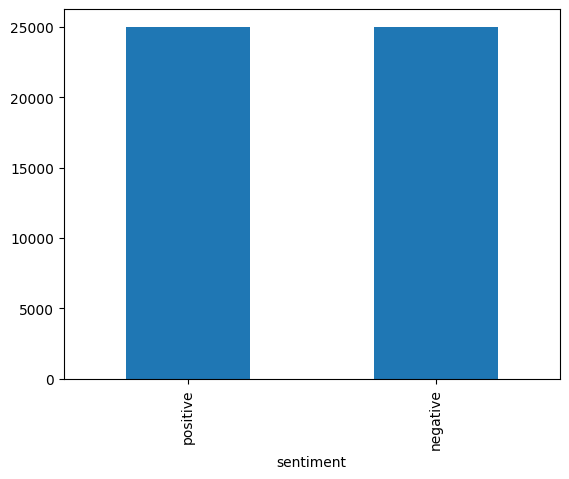

In [4]:
df["sentiment"].value_counts().plot(kind="bar")

In [5]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [7]:
pos_sen = list(df[df["sentiment"]== "positive"]["review"])
pos_sen

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

In [8]:
neg_sen = list(df[df["sentiment"]=="negative"]["review"])
neg_sen

["Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.",
 "This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further t

In [9]:
from wordcloud import WordCloud

In [28]:
def create_cloud(string, title =None):
    cloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        min_font_size=10,
        max_words=100,
        stopwords= stop_words
    ).generate(string)
        
    # 3. Plot the WordCloud image
    plt.figure(figsize=(20, 12)) # Set figure size
    plt.imshow(cloud, interpolation='bilinear') # Display the image smoothly
    plt.axis("off") # Hide axes
    if title:
        plt.title(title, fontdict={"fontsize": 15})
    plt.show()

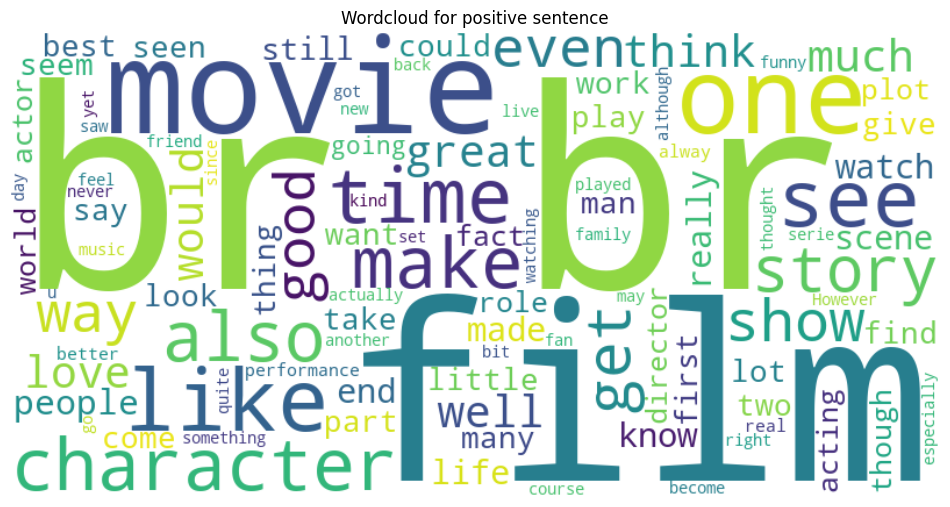

In [18]:
create_cloud(" ".join(pos_sen), "Wordcloud for positive sentence")

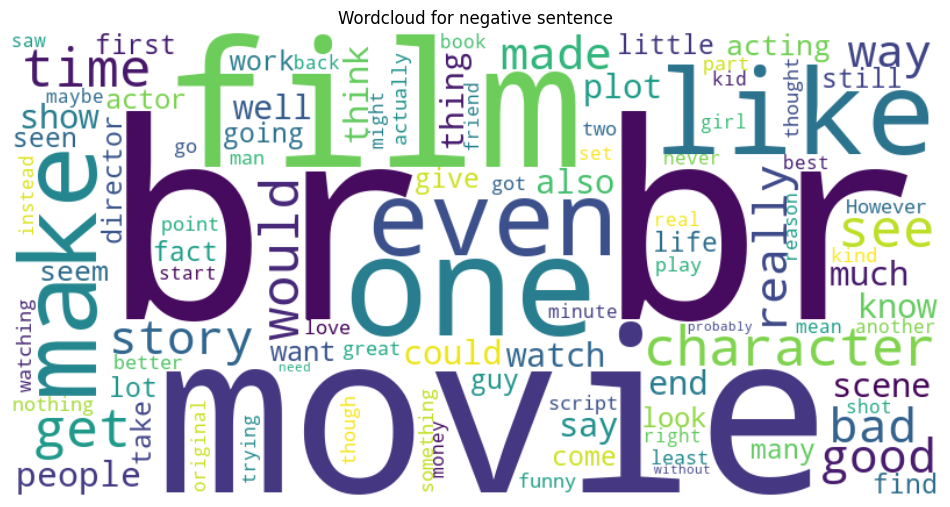

In [ ]:
create_cloud(" ".join(neg_sen), "Wordcloud for negative sentence")

In [12]:
import re
from nltk.stem import PorterStemmer

# Make sure stop_word is defined (e.g., from nltk.corpus import stopwords)
# stop_word = set(stopwords.words('english'))

def text_preprocessing(review):
    sen = re.sub(r'<br\s*/?>', '', review)
    sen = re.sub(r"won't", "will not", sen)
    sen = re.sub(r"can't", "can not", sen)
    sen = re.sub(r'\d+', '', sen)
    sen = re.sub(r'<[^>]+>', '', sen)
    sen = re.sub(r'[^\w\s]', '', sen)


    lower_sen = sen.lower()
    rem_stop = " ".join(word for word in lower_sen.split() if word not in stop_words)
    porter = PorterStemmer()# lemmatizer
    stemmed = " ".join(porter.stem(word) for word in rem_stop.split())

    return stemmed

In [14]:
df["clean_text"] = df["review"].apply(text_preprocessing)

In [15]:
df.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                          clean_text  
0  one review mention watch oz episod youll hook ...  
1  wonder littl product film techniqu unassum old...  
2  thought wonder way spend time hot summer weeke...  
3  basic there famili littl boy jake think there ...  
4  petter mattei love time money visual stun film...

In [20]:
pos_re = list(df[df["sentiment"]=="positive"]["clean_text"])
pos_re

['one review mention watch oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom co

In [22]:
neg_re = list(df[df["sentiment"]=="negative"]["clean_text"])
neg_re

['basic there famili littl boy jake think there zombi closet parent fight timethi movi slower soap opera suddenli jake decid becom rambo kill zombieok first your go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spot well play parent descent dialog shot jake ignor',
 'show amaz fresh innov idea first air first year brilliant thing drop show realli funni anymor continu declin complet wast time todayit truli disgrac far show fallen write pain bad perform almost bad mildli entertain respit guesthost show probabl wouldnt still air find hard believ creator handselect origin cast also chose band hack follow one recogn brillianc see fit replac mediocr felt must give star respect origin cast made show huge success show aw believ still air',
 'encourag posit comment film look forward watch film bad mistak ive seen film truli one worst aw almost everi 

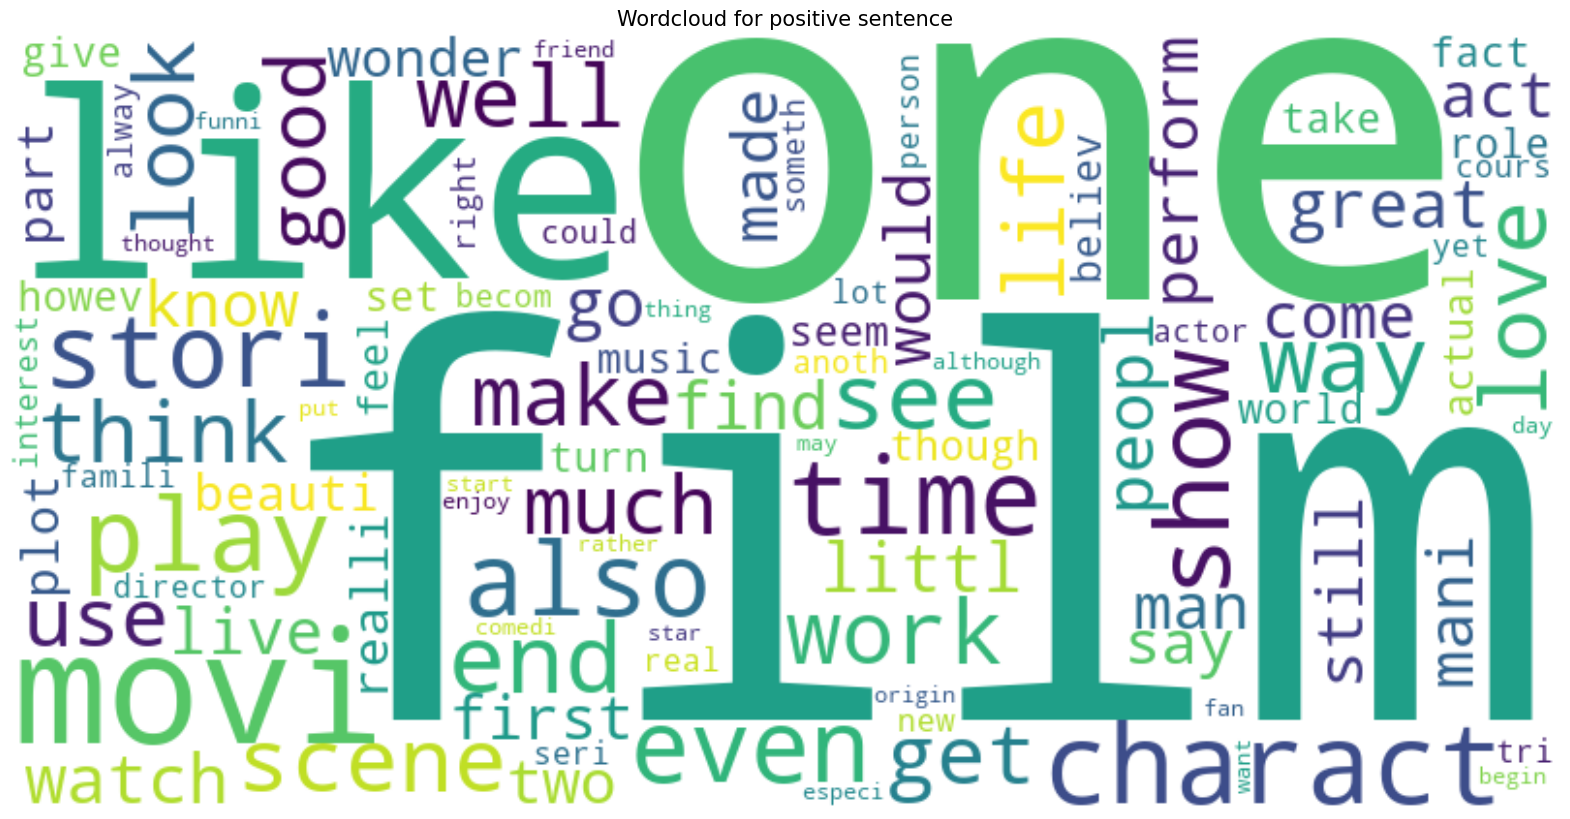

In [29]:
create_cloud(" ".join(pos_re), "Wordcloud for positive sentence")

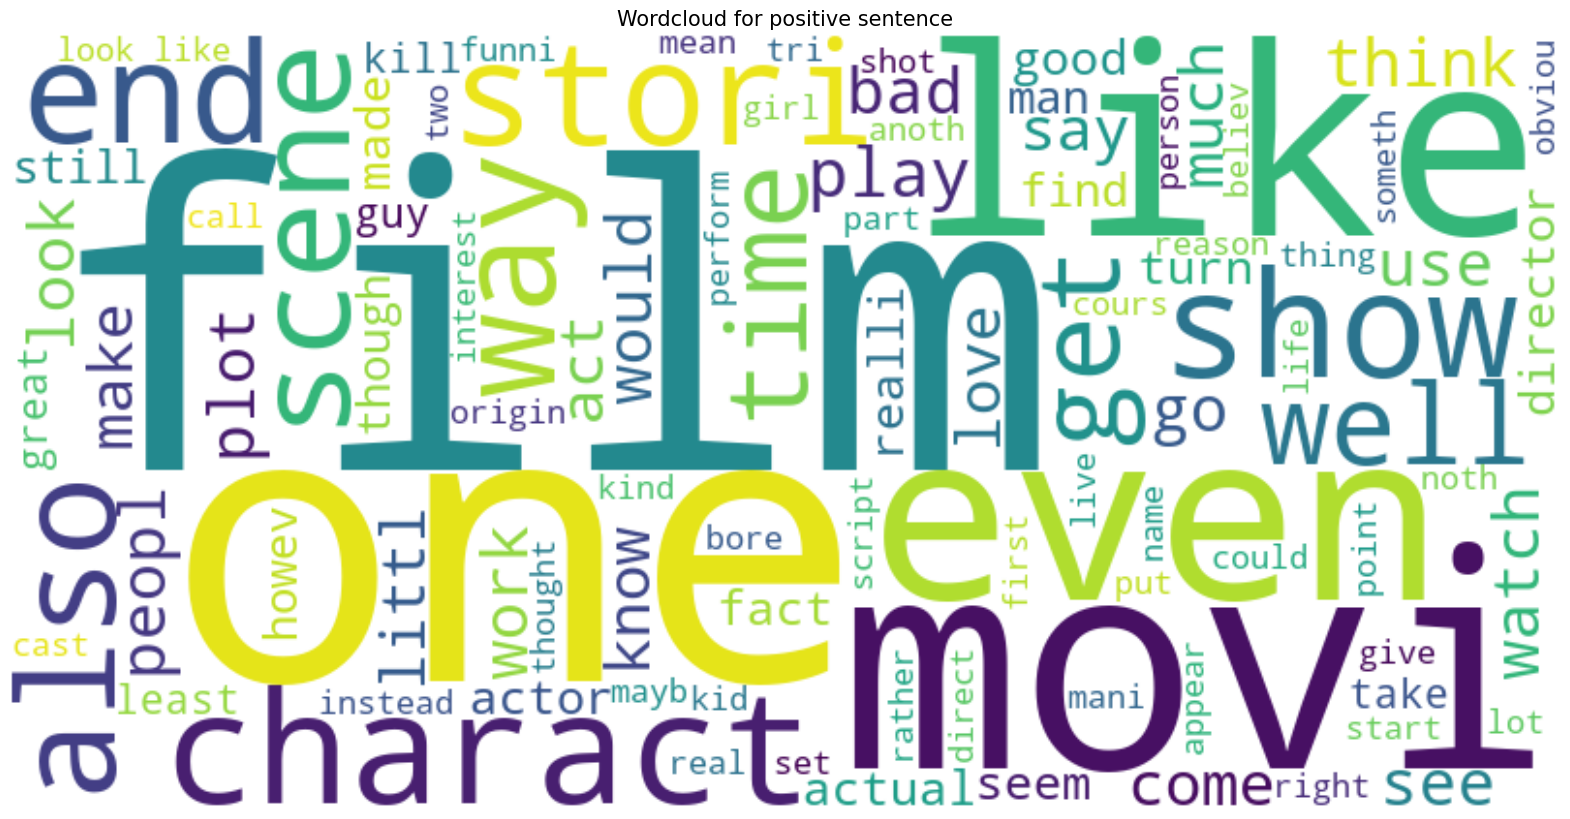

In [30]:
create_cloud(" ".join(neg_re), "Wordcloud for positive sentence")